In [1]:
path = './benignData/'
minMnemonicNum = 15
maxMnemonicNum = 80

# Libraries

In [2]:
import os
import pickle
import tqdm
import numpy as np
import matplotlib.pyplot as plt

## 중복을 허용하지 않고 mnemonic의 수를 세는 경우

In [3]:
functionNum = 0
droppedFunctionNum = 0

mnemonicNums = []
for fileName in tqdm.tqdm(os.listdir(path)):
    filePath = path + fileName
    if os.path.isfile(filePath):
        file = pickle.load(open(filePath, 'rb'))
        for function in file:
            # Save every mnemonics at mnemonics
            mnemonics = []
            for basicBlock in function:
                mnemonics.extend(basicBlock)
            
            # Get the number of mnemonics
            mnemonicNum = len(set(mnemonics)) # 아래와 다른 부분
            mnemonicNums.append(mnemonicNum)
            functionNum += 1
            if minMnemonicNum > mnemonicNum or mnemonicNum > maxMnemonicNum:
                droppedFunctionNum += 1

100%|███████████████████████████████████████████████████████████████████████████| 5001/5001 [06:21<00:00, 13.10it/s]


In [4]:
print('[ Number of functions        ] ' + str(functionNum))
print('[ Number of dropped function ] ' + str(droppedFunctionNum))
print('[ Ratio  of dropped function ] ' + str(droppedFunctionNum * 100.0 / functionNum) + '%')

[ Number of functions        ] 9258148
[ Number of dropped function ] 7334687
[ Ratio  of dropped function ] 79.22412776291759%


## 중복을 허용하여 mnemonic의 수를 세는 경우

In [5]:
functionNum = 0
droppedFunctionNum = 0

mnemonicNums = []
for fileName in tqdm.tqdm(os.listdir(path)):
    filePath = path + fileName
    if os.path.isfile(filePath):
        file = pickle.load(open(filePath, 'rb'))
        for function in file:
            # Save every mnemonics at mnemonics
            mnemonics = []
            for basicBlock in function:
                mnemonics.extend(basicBlock)
            
            # Get the number of mnemonics
            mnemonicNum = len(mnemonics) # 위와 다른 부분
            mnemonicNums.append(mnemonicNum)
            functionNum += 1
            if minMnemonicNum > mnemonicNum or mnemonicNum > maxMnemonicNum:
                droppedFunctionNum += 1

100%|███████████████████████████████████████████████████████████████████████████| 5001/5001 [06:16<00:00, 13.28it/s]


In [6]:
print('[ Number of functions        ] ' + str(functionNum))
print('[ Number of dropped function ] ' + str(droppedFunctionNum))
print('[ Ratio  of dropped function ] ' + str(droppedFunctionNum * 100.0 / functionNum) + '%')

[ Number of functions        ] 9258148
[ Number of dropped function ] 5403292
[ Ratio  of dropped function ] 58.36255804076582%


# 적절한 제한값 찾기

## 중복을 허용하지 않고 mnemonic의 수를 세는 경우

In [7]:
def getMnemonicNum():
    mnemonicNums = []
    for fileName in tqdm.tqdm(os.listdir(path)):
        filePath = path + fileName
        if os.path.isfile(filePath):
            file = pickle.load(open(filePath, 'rb'))
            for function in file:
                # Save every mnemonics at mnemonics
                mnemonics = []
                for basicBlock in function:
                    mnemonics.extend(basicBlock)
                
                # Get the number of mnemonics
                mnemonicNum = len(set(mnemonics))
                mnemonicNums.append(mnemonicNum)
                    
    return mnemonicNums

In [8]:
mnemonicNums = getMnemonicNum()
mnemonicNums = np.array(mnemonicNums)

100%|███████████████████████████████████████████████████████████████████████████| 5001/5001 [07:19<00:00, 11.39it/s]


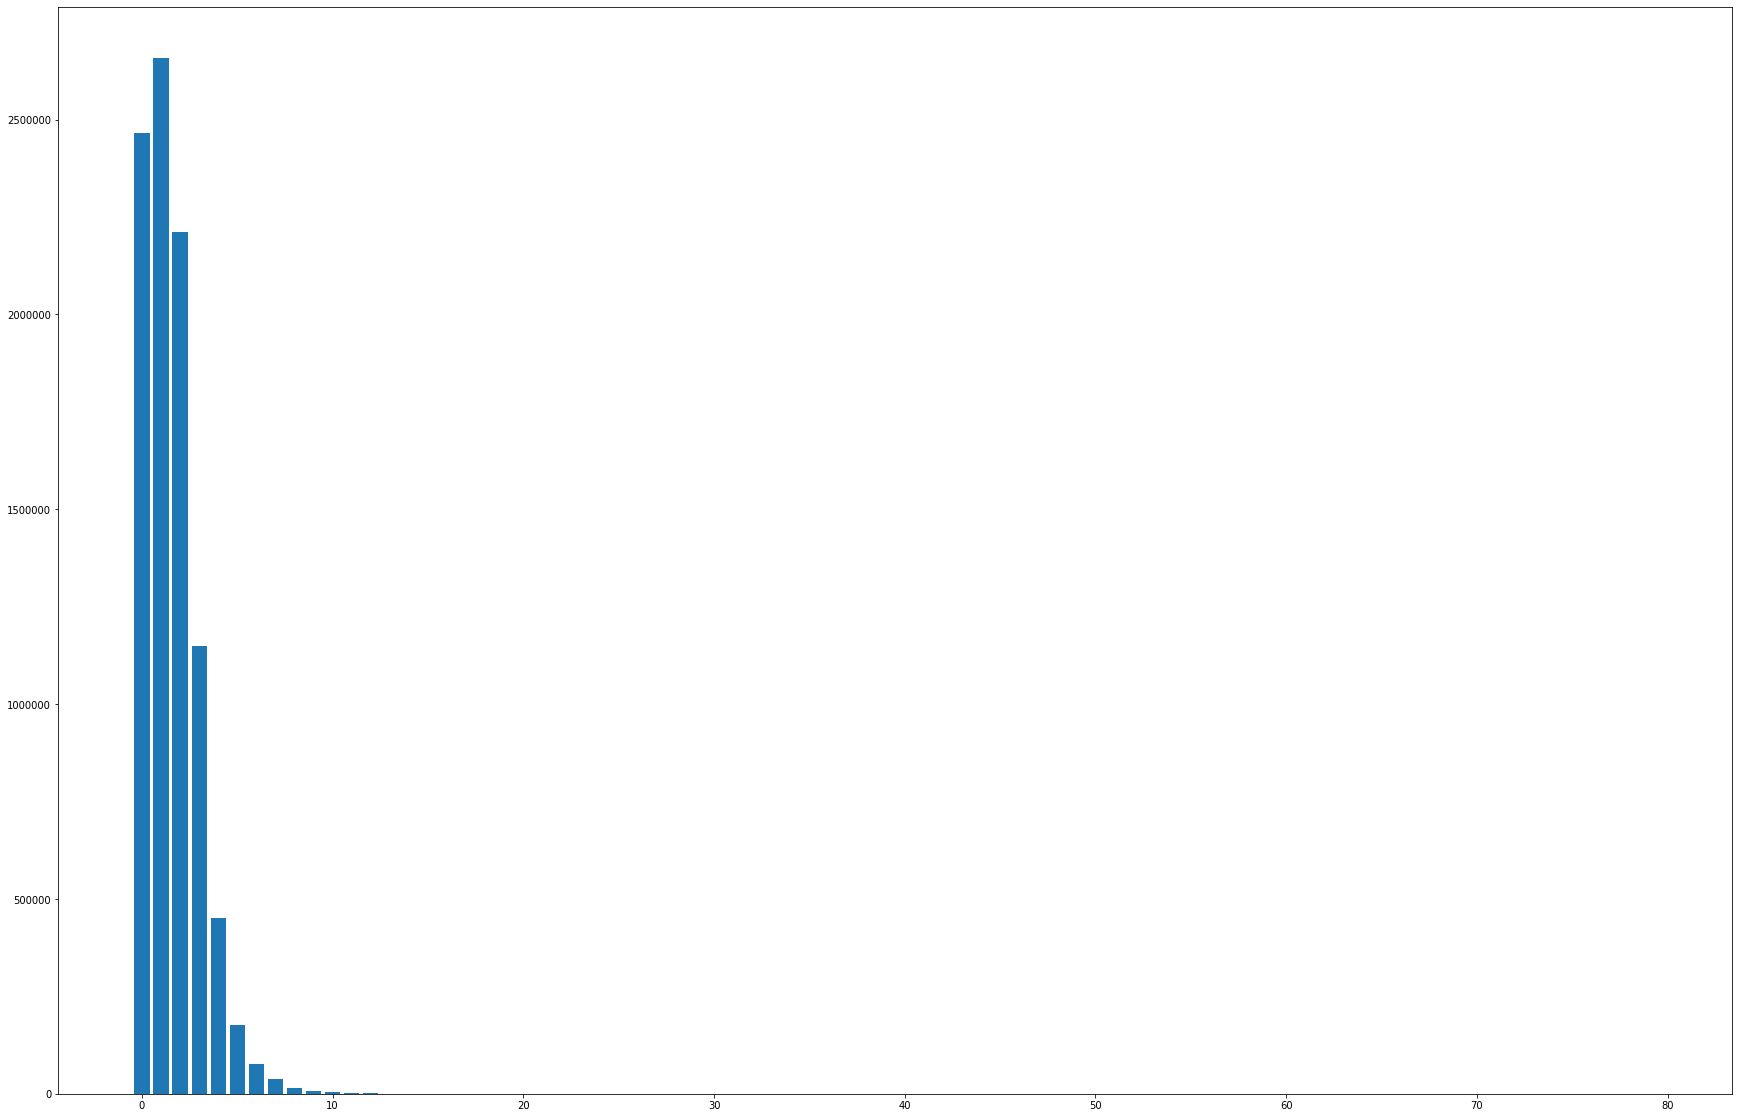

In [9]:
unit = 5
maximum = 400

ratioStack = []
for i in range(0, maximum + unit, unit):
    ratioStack.append((mnemonicNums >= i).sum())

ratio = []
for i in range(len(ratioStack) - 1):
    ratio.append(ratioStack[i] - ratioStack[i + 1])

plt.figure(figsize=(30, 20))
plt.bar(range(len(ratio)), ratio)
plt.show()

## 중복을 허용하여 mnemonic의 수를 세는 경우

In [10]:
def getMnemonicNum():
    mnemonicNums = []
    for fileName in tqdm.tqdm(os.listdir(path)):
        filePath = path + fileName
        if os.path.isfile(filePath):
            file = pickle.load(open(filePath, 'rb'))
            for function in file:
                # Save every mnemonics at mnemonics
                mnemonics = []
                for basicBlock in function:
                    mnemonics.extend(basicBlock)
                
                # Get the number of mnemonics
                mnemonicNum = len(mnemonics)
                mnemonicNums.append(mnemonicNum)
                    
    return mnemonicNums

In [11]:
mnemonicNums = getMnemonicNum()
mnemonicNums = np.array(mnemonicNums)

100%|███████████████████████████████████████████████████████████████████████████| 5001/5001 [06:05<00:00, 13.69it/s]


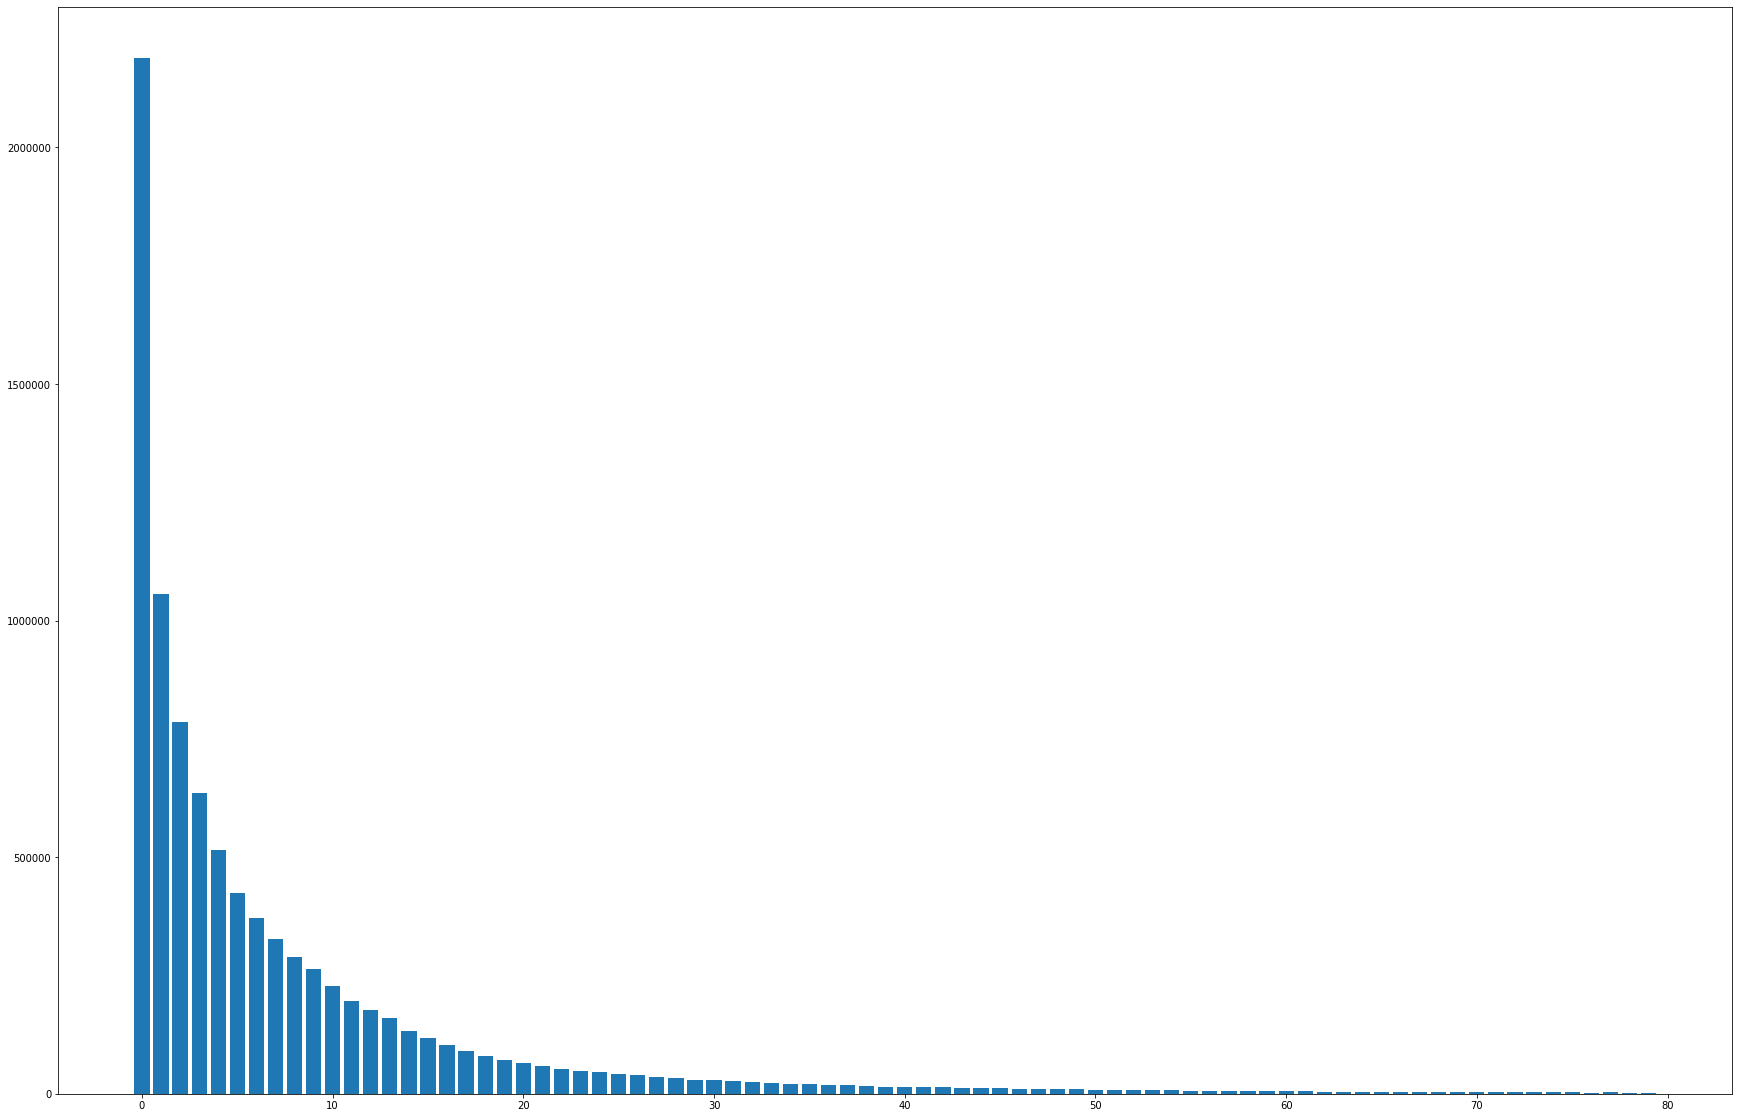

In [12]:
unit = 5
maximum = 400

ratioStack = []
for i in range(0, maximum + unit, unit):
    ratioStack.append((mnemonicNums >= i).sum())

ratio = []
for i in range(len(ratioStack) - 1):
    ratio.append(ratioStack[i] - ratioStack[i + 1])

plt.figure(figsize=(30, 20))
plt.bar(range(len(ratio)), ratio)
plt.show()